## Ordinary Least-Squares : t-Statistics, standard error, degrees of freedom & f-statistic

## Body Fat Prediction

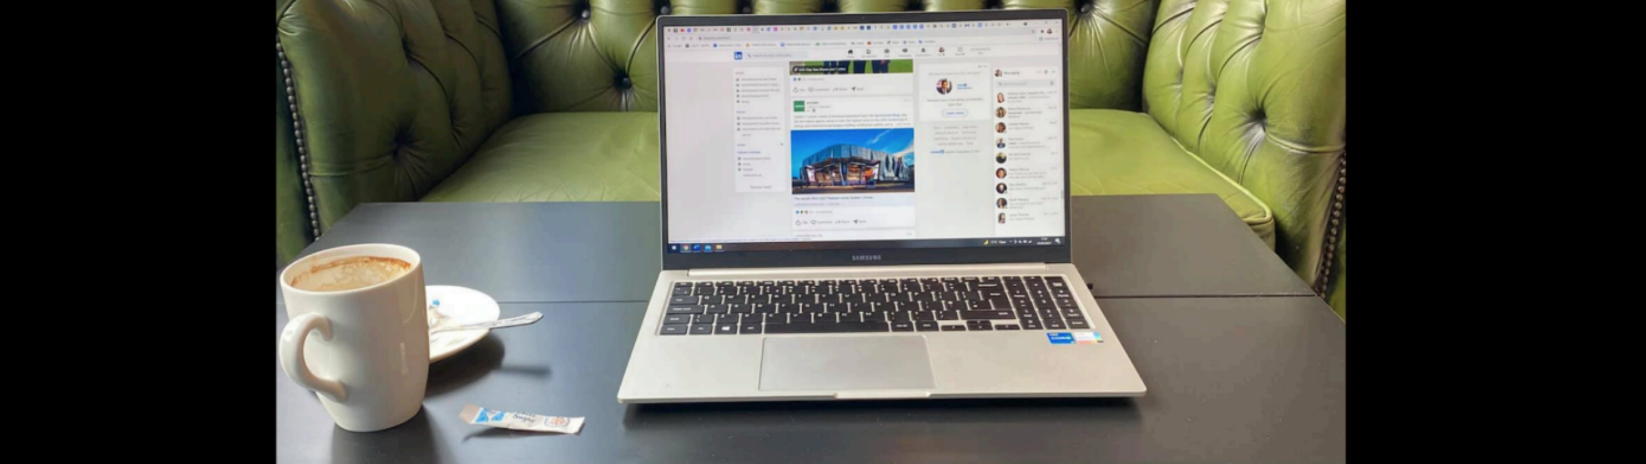

## Hemant Thapa

### 1. Importing Libraries 

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import LinAlgError

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

- Density determined from underwater weighing
- Percent body fat from Siri's (1956) equation
- Age (years)
- Weight (lbs)
- Height (inches)
- Neck circumference (cm)
- Chest circumference (cm)
- Abdomen 2 circumference (cm)
- Hip circumference (cm)
- Thigh circumference (cm)
- Knee circumference (cm)
- Ankle circumference (cm)
- Biceps (extended) circumference (cm)
- Forearm circumference (cm)
- Wrist circumference (cm)

(Measurement standards are apparently those listed in Benhke and Wilmore (1974), pp. 45-48 where, for instance, the abdomen 2 circumference is measured "laterally, at the level of the iliac crests, and anteriorly, at the umbilicus".)

These data are used to produce the predictive equations for lean body weight given in the abstract "Generalized body composition prediction equation for men using simple measurement techniques", K.W. Penrose, A.G. Nelson, A.G. Fisher, FACSM, Human Performance Research Center, Brigham Young University, Provo, Utah 84602 as listed in Medicine and Science in Sports and Exercise, vol. 17, no. 2, April 1985, p. 189. (The predictive equation were obtained from the first 143 of the 252 cases that are listed below).

A variety of popular health books suggest that readers assess their health, at least in part, by estimating their percentage of body fat. For instance, in Bailey (1994), readers can estimate body fat from tables using their age and various skin-fold measurements obtained by using a caliper. Other texts provide predictive equations for body fat using body circumference measurements (e.g., abdominal circumference) and/or skin-fold measurements. See, for instance, Behnke and Wilmore (1974), pp. 66-67; Wilmore (1976), p. 247; or Katch and McArdle (1977), pp. 120-132.

The percentage of body fat for an individual can be estimated once body density has been determined. Folks (e.g., Siri (1956)) assume that the body consists of two components - lean body tissue and fat tissue. Letting:

- D = Body Density (gm/cm³)
- A = proportion of lean body tissue
- B = proportion of fat tissue (A+B=1)
- a = density of lean body tissue (gm/cm³)
- b = density of fat tissue (gm/cm³)

we have:

$$
D = \frac{1}{\left(\frac{A}{a}\right) + \left(\frac{B}{b}\right)}
$$

Solving for B, we find:

$$
B = \frac{1}{D} \cdot \left[\frac{ab}{a-b}\right] - \left[\frac{b}{a-b}\right]
$$

Using the estimates a = 1.10 gm/cm³ and b = 0.90 gm/cm³ (see Katch and McArdle (1977), p. 111 or Wilmore (1976), p. 123), we come up with "Siri's equation":

$$
\text{Percentage of Body Fat} \ (i.e., 100 \cdot B) = \frac{495}{D} - 450
$$

Volume, and hence body density, can be accurately measured in a variety of ways. The technique of underwater weighing computes body volume as the difference between body weight measured in air and weight measured during water submersion. In other words, body volume is equal to the loss of weight in water with the appropriate temperature correction for the water's density (Katch and McArdle (1977), p. 113). Using this technique,

$$
\text{Body Density} = \frac{WA}{\frac{(WA - WW)}{c.f.} - LV}
$$

where:

- WA = Weight in air (kg)
- WW = Weight in water (kg)
- c.f. = Water correction factor (=1 at 39.2 deg F as one-gram of water occupies exactly one cm³ at this temperature, =.997 at 76-78 deg F)
- LV = Residual Lung Volume (liters)

(Katch and McArdle (1977), p. 115). Other methods of determining body volume are given in Behnke and Wilmore (1974), p. 22 ff.


### 2. Loading dataset

In [2]:
df = pd.read_csv('bodyfat.csv')
df[:5]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### 3. Data Pre Processing 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


#### All columns are numerical.

In [4]:
df.shape

(252, 15)

#### We have nearly, 252 Rows and 15 Columns in our dataset.

In [5]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [6]:
#converting into lower case
df.columns = df.columns.str.lower()

In [7]:
df.columns

Index(['density', 'bodyfat', 'age', 'weight', 'height', 'neck', 'chest',
       'abdomen', 'hip', 'thigh', 'knee', 'ankle', 'biceps', 'forearm',
       'wrist'],
      dtype='object')

### 4. Descriptive statistical analysis. 

In [8]:
#quantitative values
df.describe()

,density,bodyfat,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


### 5. Exploratory Data Analysis (EDA)

#### 5.1 Scatter Plot

In [9]:
#creating function for checking scatter plot between bodyfats over all columns
def scatter_plots(x_list, y, f, n_rows=3):
    num_plots = len(x_list)
    n_rows = max(n_rows, 3)
    rows = math.ceil(num_plots / n_rows)
    fig, axes = plt.subplots(nrows=rows, ncols=n_rows, figsize=(16, 4 * rows))
    axes_flat = axes.flatten()
    axes_dict = {}
    for i, x in enumerate(x_list):
        ax = axes_flat[i]
        ax.scatter(df[x], df[y], color='black', s=20)
        ax.grid(True, ls='--', alpha=0.3, color='black')
        ax.set_title(f'{x} vs {y}')
        ax.set_ylabel(y)
        ax.set_xlabel(x)
        axes_dict[f'ax{i+1}'] = ax
    for ax in axes_flat[num_plots:]:
        ax.set_visible(False)
    plt.tight_layout()
    plt.show()

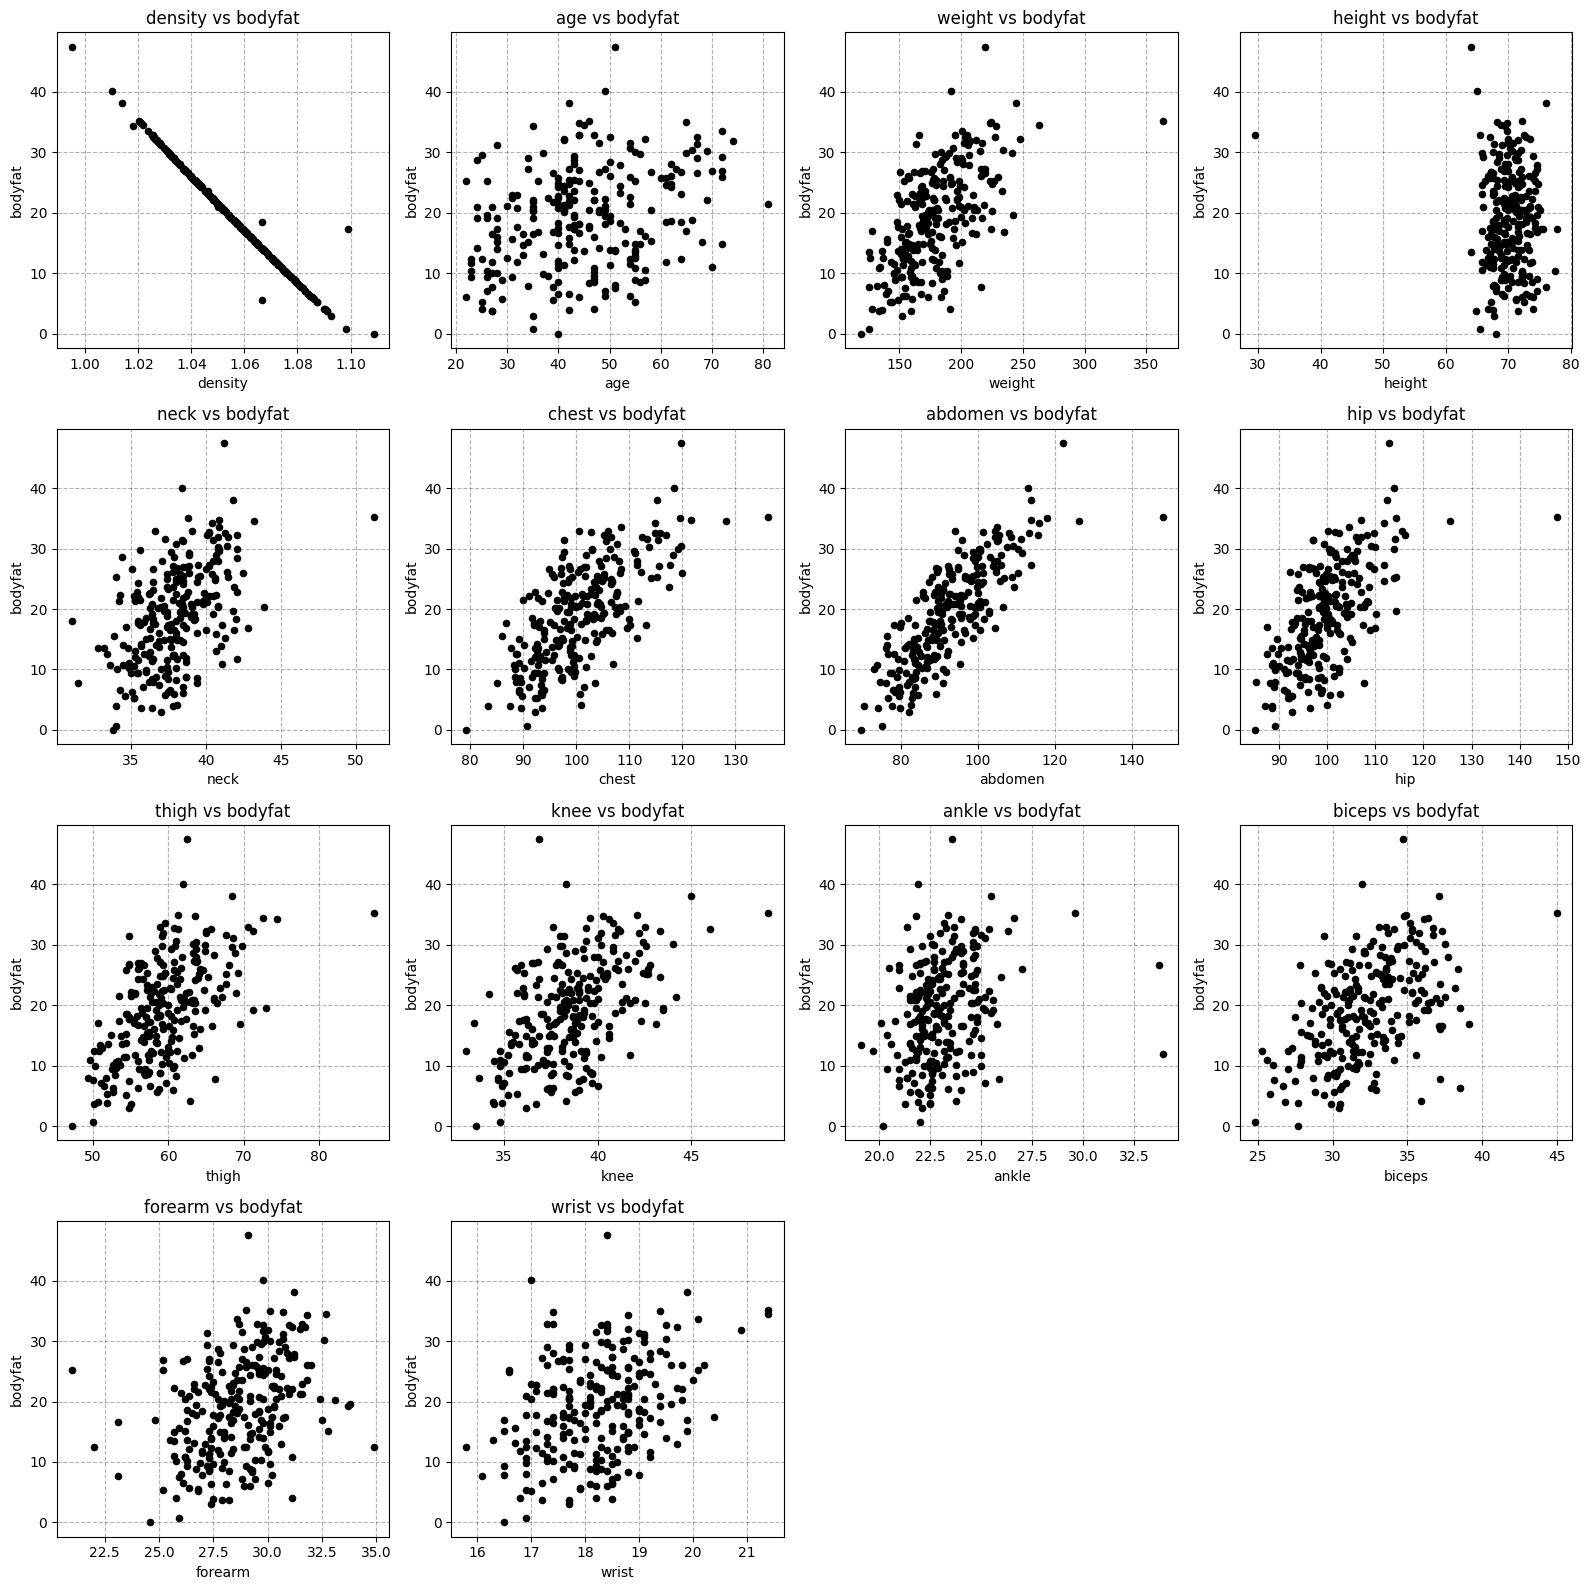

In [10]:
scatter_plots(['density', 'age', 'weight', 'height', 'neck', 'chest','abdomen', 'hip', 'thigh', 'knee', 'ankle', 'biceps', 'forearm','wrist'],'bodyfat',  df, n_rows=4)

#### 5.2 Box Plot

In [11]:
#creating box plot function to check outliers
def boxplots_with_mean_median_outliers(df, columns, plots_per_row=4):
    num_plots = len(columns)
    nrows = int(np.ceil(num_plots / plots_per_row))
    fig, axs = plt.subplots(nrows=nrows, ncols=plots_per_row, figsize=(plots_per_row * 6, nrows * 4))
    axs = axs.flatten()  
    for i, column in enumerate(columns):
        if i < num_plots:
            sns.boxplot(x=df[column], ax=axs[i], color='black', flierprops=dict(markerfacecolor='black', marker='o'))
            mean_value = df[column].mean()
            median_value = df[column].median()
            axs[i].axvline(mean_value, color='red', lw=2, linestyle='--', label=f'Mean ({mean_value:.2f})')
            axs[i].axvline(median_value, color='cyan', linestyle=':', label=f'Median ({median_value:.2f})')
            axs[i].grid(True, ls='--', color='grey', alpha=0.5)
            axs[i].set_title(f'Box Plot of {column}')
            axs[i].legend()
    for i in range(num_plots, len(axs)):
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

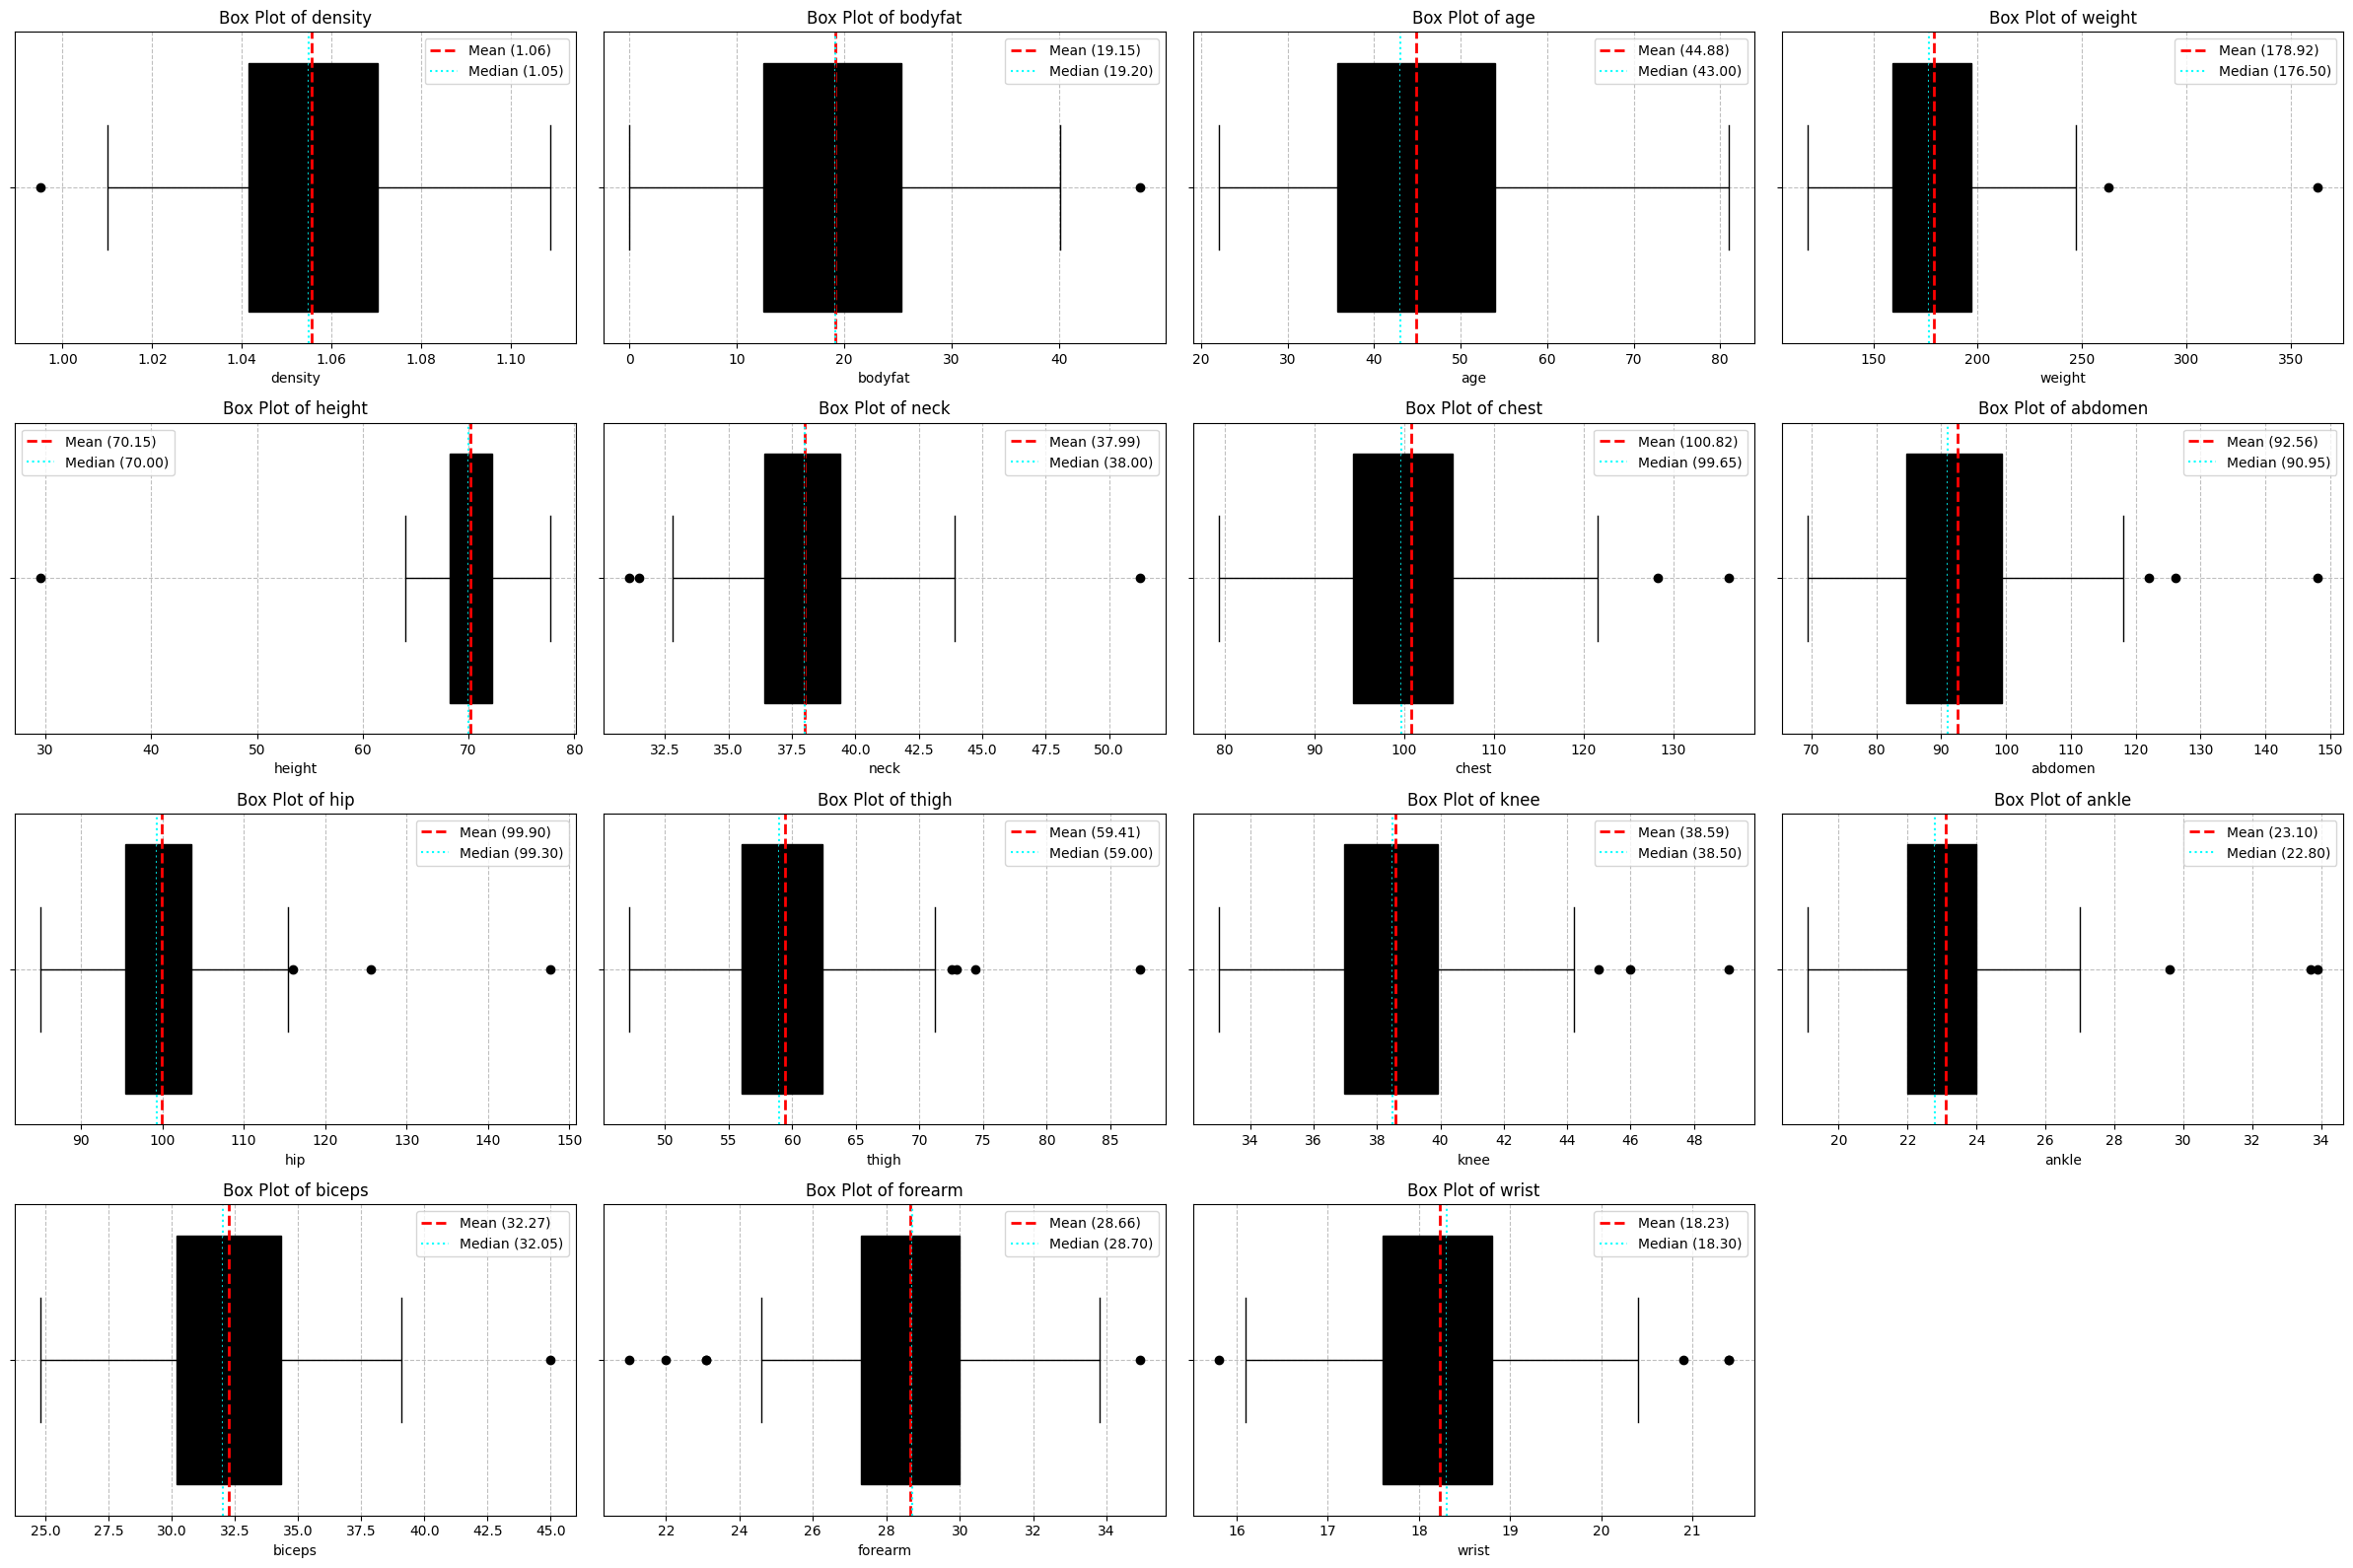

In [12]:
boxplots_with_mean_median_outliers(df, df.columns)

#### 5.3 Removing Outliers from Dataset

In [13]:
before_rows = df.shape[0]
before_rows

252

In [14]:
#creating function to remove outliers from all columns
def removing_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

In [15]:
for i in df.columns:
    df = removing_outliers(df, i)

In [16]:
filtered = df.shape[0]
filtered

230

In [17]:
print(f"Before shape was {before_rows} and after removing outliers our shape is {filtered}")

Before shape was 252 and after removing outliers our shape is 230


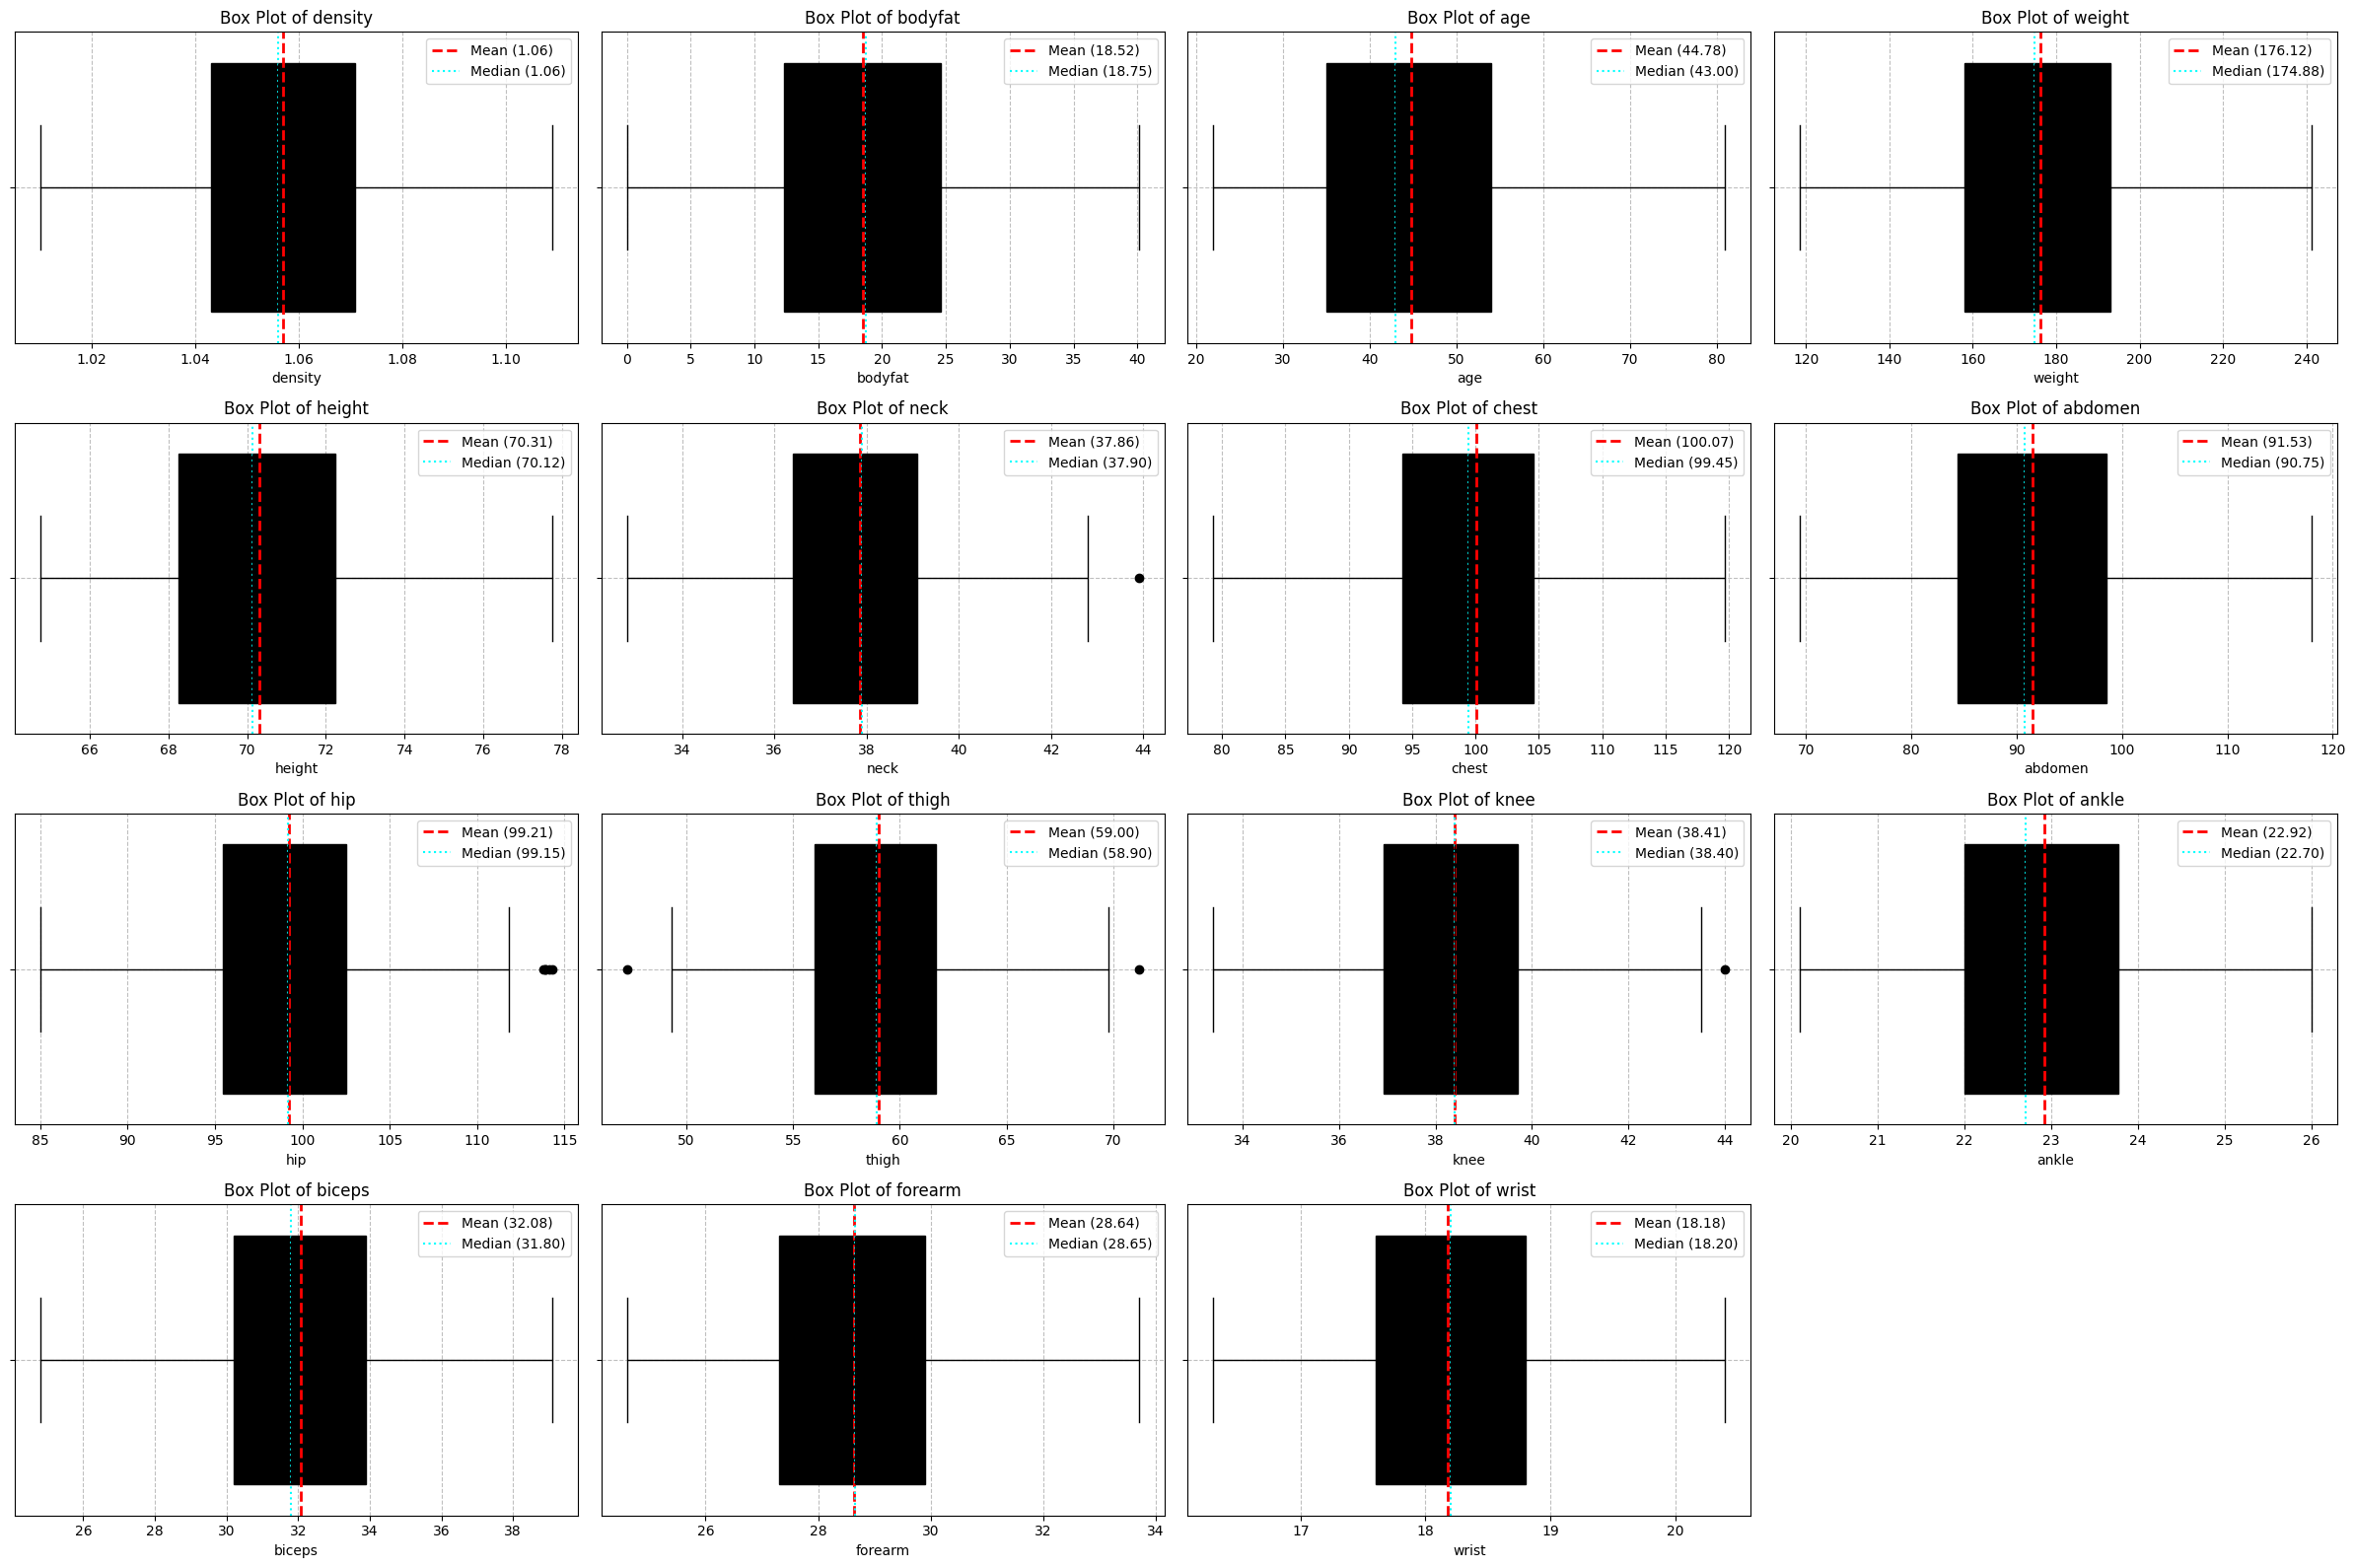

In [18]:
boxplots_with_mean_median_outliers(df, df.columns)

#### 5.4 Histogram Distribution 

In [19]:
#creating function to create histogram plot over all columns
def histograms_with_distribution(df, columns, plots_per_row=4):
    num_plots = len(columns)
    nrows = int(np.ceil(num_plots / plots_per_row))
    fig, axs = plt.subplots(nrows=nrows, ncols=plots_per_row, figsize=(plots_per_row * 6, nrows * 4))
    axs = axs.flatten() 
    for i, column in enumerate(columns):
        if i < num_plots:
            sns.histplot(df[column], ax=axs[i], kde=True, color='black', alpha=0.8)
            mean_value = df[column].mean()
            median_value = df[column].median()
            skewness = df[column].skew()
            axs[i].annotate(f'Mean: {mean_value:.2f}\nMedian: {median_value:.2f}\nSkewness: {skewness:.2f}', 
                            xy=(0.85, 0.9), xycoords='axes fraction', fontsize=10,
                            color='red', ha='right', va='center', bbox=dict(boxstyle='round', facecolor='white'))

            axs[i].set_title(f'Histogram of {column}')
            axs[i].grid(True, ls='--', color='grey', alpha=0.5)
    for i in range(num_plots, len(axs)):
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

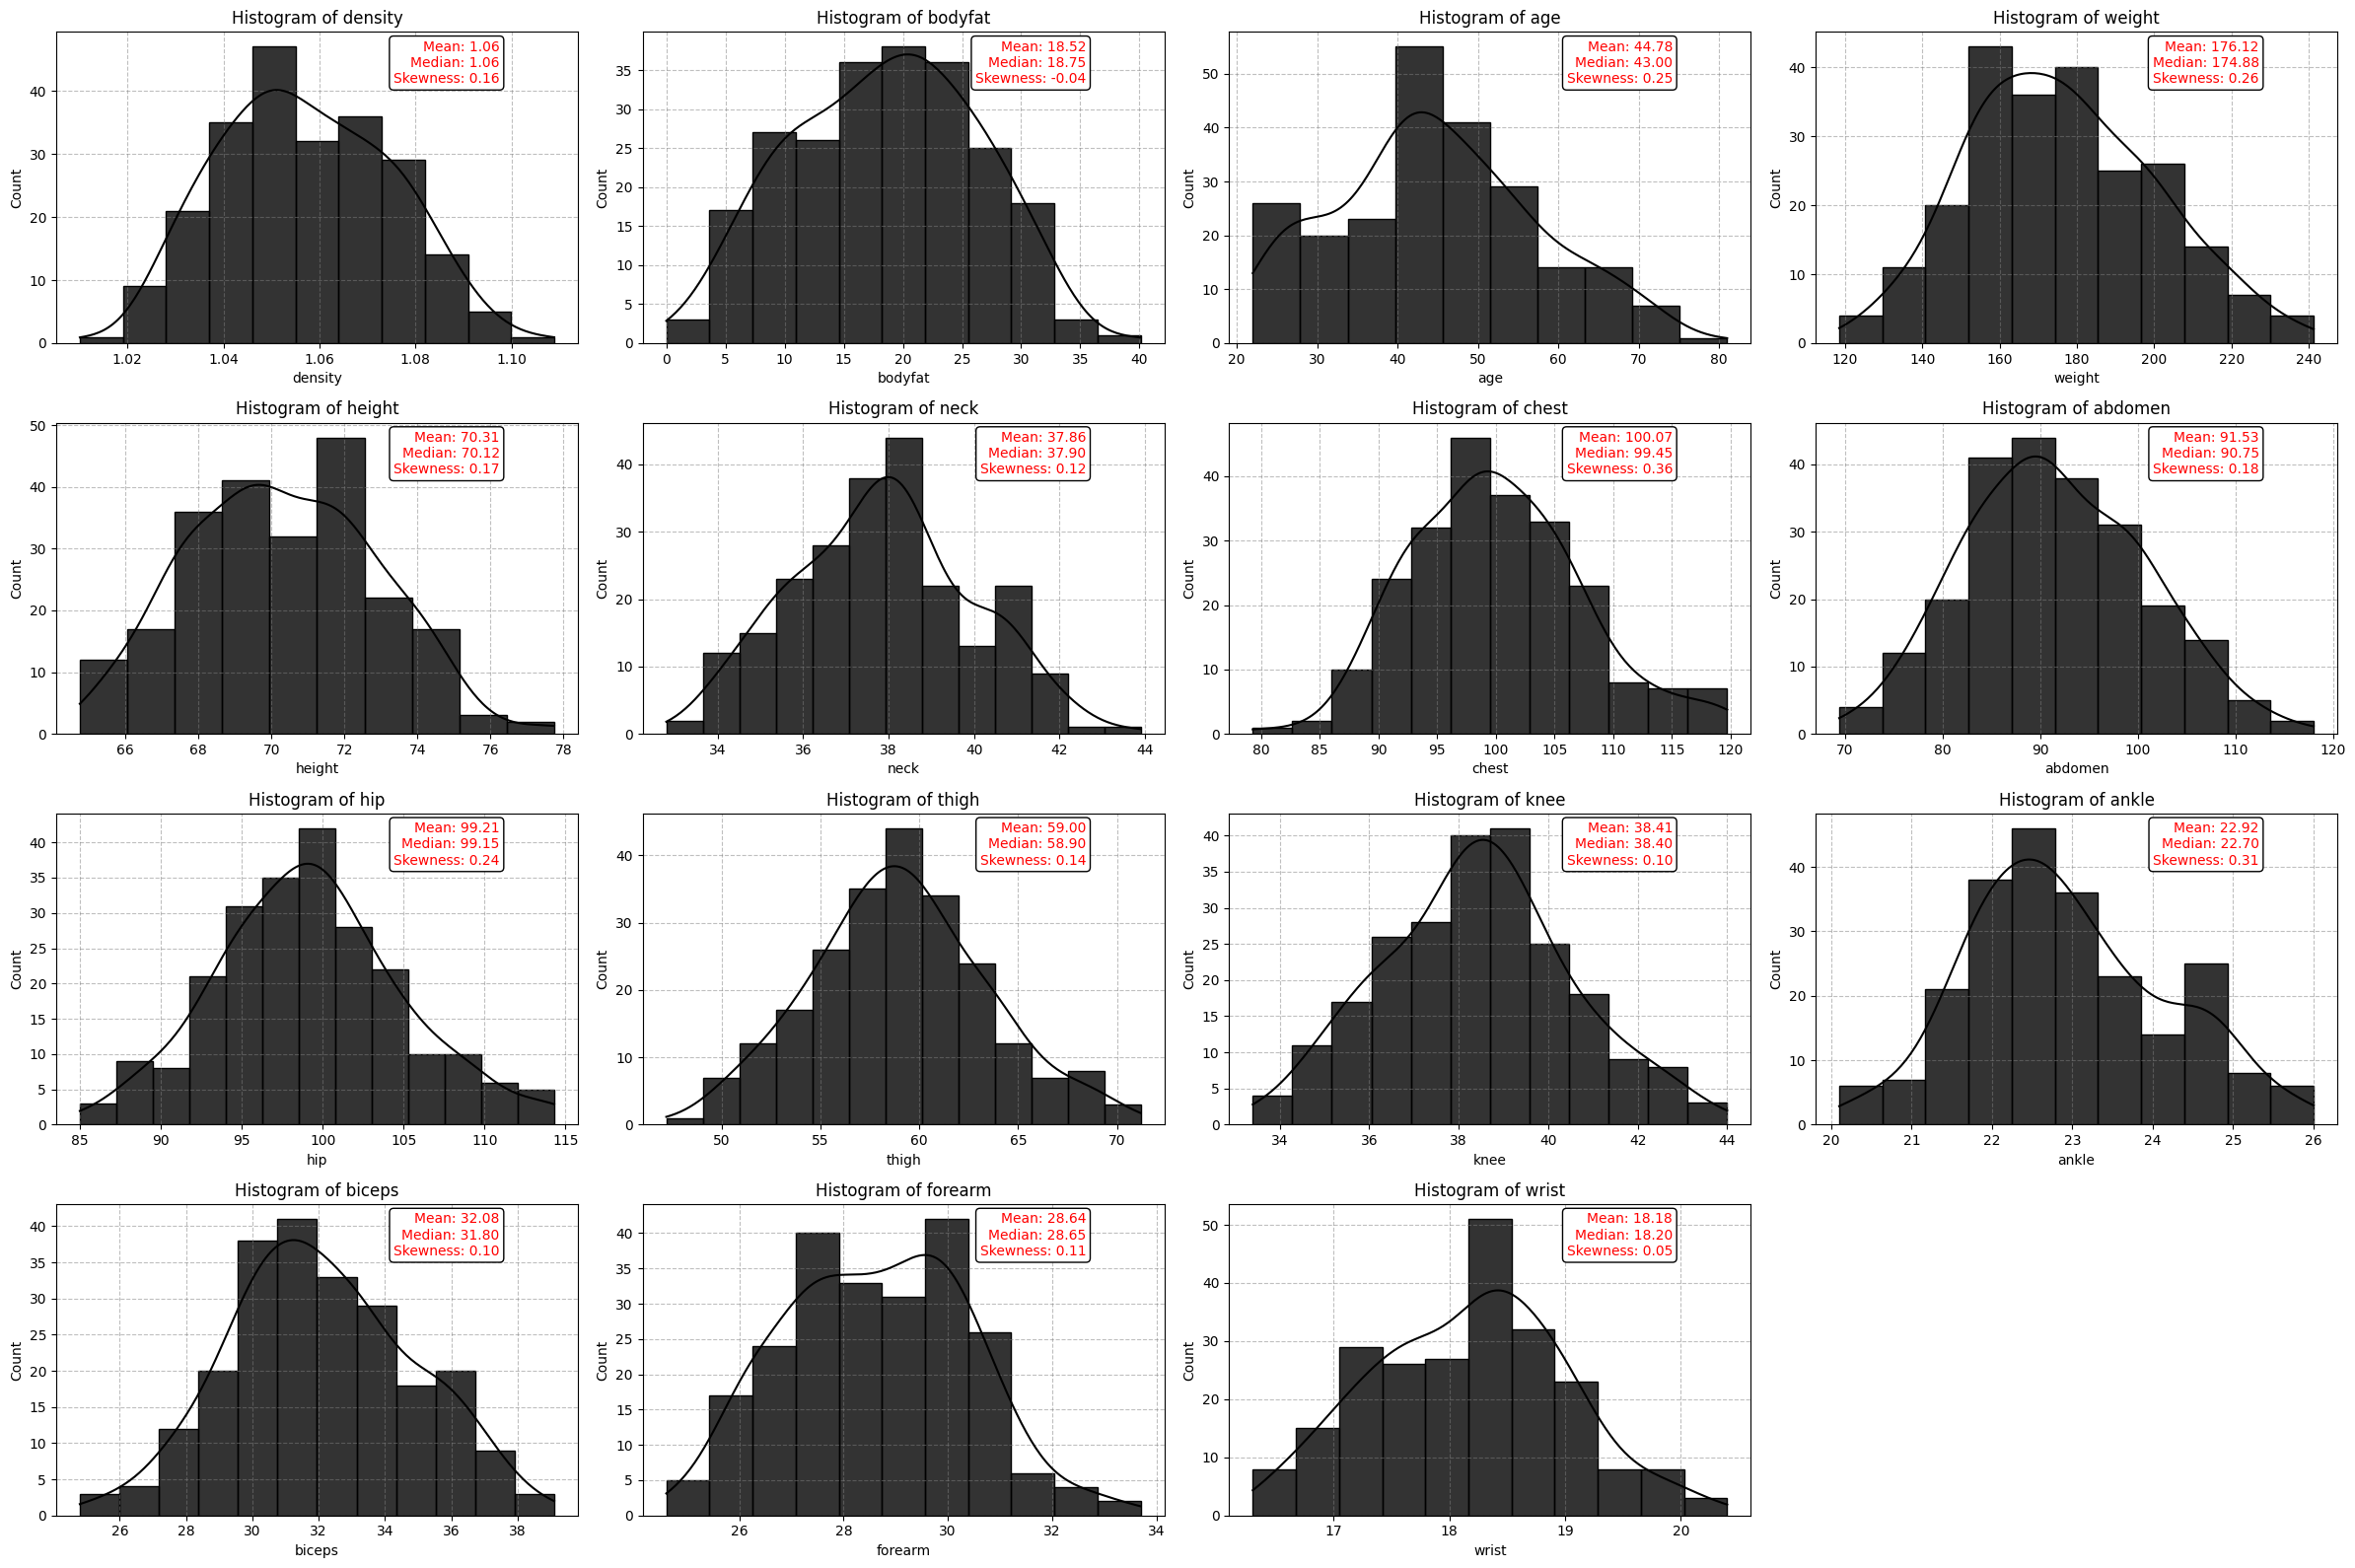

In [20]:
histograms_with_distribution(df, df.columns)

#### 5.5 Kurtosis Analysis 

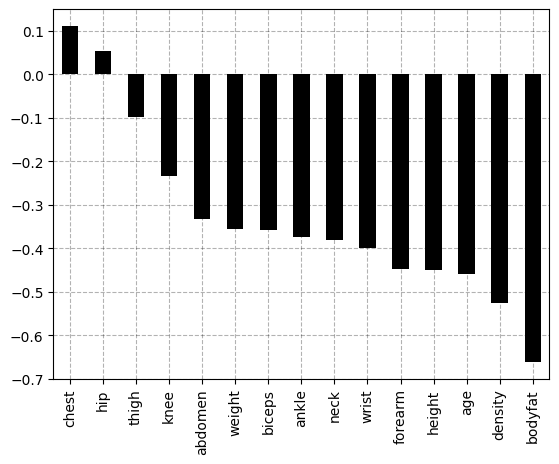

In [21]:
#kurtosis analysis
df.kurt().sort_values(ascending=False).plot(kind='bar', color='black')
plt.grid(True, ls='--', alpha=0.3, color='black')

#### 5.6 Skewness Analaysis 

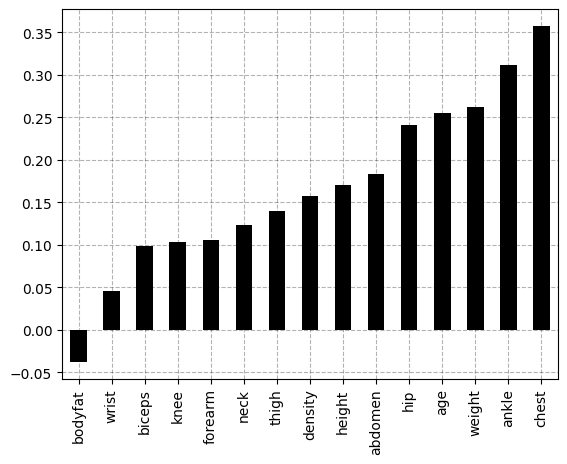

In [22]:
#skewness analysis
df.skew().sort_values().plot(kind='bar', color='black')
plt.grid(True, ls='--', alpha=0.3, color='black')

#### 5.7 Correlation Matrix Analysis

In [23]:
#correlation analysis 
corr_matrix = df.corr()
corr_matrix

,density,bodyfat,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
density,1.000000,-0.985195,-0.283117,-0.549839,0.057147,-0.417297,-0.634854,-0.785375,-0.570972,-0.508291,-0.452451,-0.225699,-0.434217,-0.353538,-0.245077
bodyfat,-0.985195,1.000000,0.298978,0.573286,-0.039915,0.438551,0.659287,0.802911,0.590550,0.517271,0.470350,0.226079,0.441578,0.367219,0.270504
age,-0.283117,0.298978,1.000000,-0.012681,-0.238290,0.142187,0.201057,0.273555,-0.060045,-0.224636,0.010044,-0.190624,-0.045330,-0.075654,0.238001
weight,-0.549839,0.573286,-0.012681,1.000000,0.528017,0.777908,0.867970,0.846462,0.918129,0.820574,0.841181,0.679817,0.748616,0.782221,0.684528
height,0.057147,-0.039915,-0.238290,0.528017,1.000000,0.286046,0.209278,0.173781,0.408979,0.320859,0.484783,0.467125,0.280356,0.352001,0.384136
neck,-0.417297,0.438551,0.142187,0.777908,0.286046,1.000000,0.727889,0.687393,0.654914,0.610384,0.618606,0.487270,0.666204,0.763418,0.717665
chest,-0.634854,0.659287,0.201057,0.867970,0.209278,0.727889,1.000000,0.884940,0.784154,0.655620,0.680244,0.489372,0.667896,0.680101,0.601101
abdomen,-0.785375,0.802911,0.273555,0.846462,0.173781,0.687393,0.884940,1.000000,0.828396,0.693114,0.703751,0.441517,0.611763,0.583775,0.545458
hip,-0.570972,0.590550,-0.060045,0.918129,0.408979,0.654914,0.784154,0.828396,1.000000,0.861841,0.822665,0.607309,0.685904,0.679812,0.552050
thigh,-0.508291,0.517271,-0.224636,0.820574,0.320859,0.610384,0.655620,0.693114,0.861841,1.000000,0.769667,0.626063,0.705517,0.683062,0.472723


In [24]:
#checking high correlation between variables
def correlation_matrix(corr_matrix, threshold=0.65):
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    cmap = sns.color_palette("gray", as_cmap=True)  
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},
                annot=True, fmt=".2f")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=3))
    plt.show()

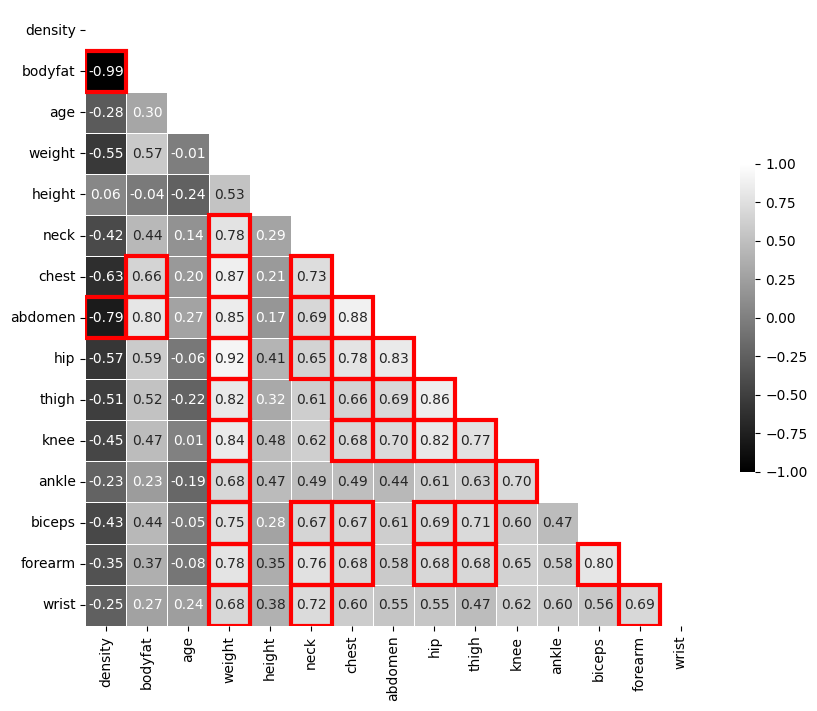

In [25]:
correlation_matrix(corr_matrix)

#### Red sqaure box are highely correlated variables. 

### 6. Feature Selection 

In [26]:
df = df.drop(columns=['height'])
df[:5]

,density,bodyfat,age,weight,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
0,1.0708,12.3,23,154.25,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [27]:
y = df['bodyfat'].values
y[:5]

array([12.3,  6.1, 25.3, 10.4, 28.7])

In [28]:
X = df.drop(columns=['bodyfat'])
X[:5]

,density,age,weight,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
0,1.0708,23,154.25,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,22,173.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,22,154.00,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,26,184.75,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,24,184.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### 7. Feature Scaling 

In [29]:
X = (X - X.mean()) / X.std()

In [30]:
X[:5]

,density,age,weight,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
0,0.767465,-1.720491,-0.906614,-0.794390,-0.950928,-0.690521,-0.818852,0.000488,-0.522804,-0.834377,-0.028614,-0.700653,-1.290263
1,1.572843,-1.799476,-0.118967,0.309451,-0.882746,-0.930661,-0.088935,-0.066824,-0.522804,0.394219,-0.571025,0.148400,0.028140
2,-0.865511,-1.799476,-0.916978,-1.850239,-0.582747,-0.395804,-0.002040,0.135111,0.233751,0.885658,-1.185758,-1.945930,-1.889538
3,1.006301,-1.483537,0.357766,-0.218473,0.235435,-0.559536,0.345539,0.247297,-0.522804,-0.097219,0.116029,0.431417,0.028140
4,-1.276532,-1.641506,0.337039,-1.658267,-0.378201,0.924966,0.467192,0.942851,1.794146,0.885658,0.043707,-0.530843,-0.571134


### 8. Train Test and Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

### 9. Building OLS Regression Model

In [33]:
class LinearRegression:
    
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.coefficients = None
        self.residuals = None
        self.standard_error = None
        self.t_statistics = None
        self.degrees_of_freedom = None
        self.f_statistic = None
        self.mse_history = []  

    def fit(self, X, y, method='gradient_descent'):
        X, y = np.atleast_2d(X), np.array(y)
        if X.shape[0] != y.shape[0]:
            raise ValueError("The number of rows in X must match the length of y.")
        if y.ndim != 1:
            raise ValueError("y must be a 1D array.")

        X_with_bias = np.column_stack((np.ones(X.shape[0]), X))
        n, k = X_with_bias.shape

        if method == 'normal_equation':
            try:
                self.coefficients = np.linalg.inv(X_with_bias.T.dot(X_with_bias)).dot(X_with_bias.T).dot(y)
            except LinAlgError:
                raise LinAlgError("X^TX is a singular matrix. Consider using regularization or reducing the number of features.")
        elif method == 'gradient_descent':
            self.coefficients = np.random.randn(k)
            for _ in range(self.num_iterations):
                predictions = X_with_bias.dot(self.coefficients)
                errors = predictions - y
                gradients = 2/n * X_with_bias.T.dot(errors)
                self.coefficients -= self.learning_rate * gradients
                mse = np.mean(errors**2)
                self.mse_history.append(mse)

        #residuals 
        predictions = X_with_bias.dot(self.coefficients)
        self.residuals = y - predictions
        sum_squared_residuals = np.sum(self.residuals ** 2)
        self.degrees_of_freedom = n - k

        #standard error and t-statistics
        MSE = sum_squared_residuals / self.degrees_of_freedom
        var_beta = MSE * np.linalg.inv(X_with_bias.T.dot(X_with_bias))
        self.standard_error = np.sqrt(np.diag(var_beta))
        self.t_statistics = self.coefficients / self.standard_error

        #F-statistic and p-value
        sum_squared_total = np.sum((y - np.mean(y))**2)
        sum_squared_regression = sum_squared_total - sum_squared_residuals
        MSR = sum_squared_regression / (k - 1)
        self.f_statistic = MSR / MSE
        
    #predictions
    def predict(self, X):
        if self.coefficients is None:
            raise ValueError("Model must be fitted before prediction.")
        X = np.atleast_2d(X)
        X_with_bias = np.column_stack((np.ones(X.shape[0]), X))
        return X_with_bias.dot(self.coefficients)
    #mean loss
    def mse_loss(self):
        if not self.mse_history:
            raise ValueError("MSE history is empty. Ensure that the model is fitted using gradient descent.")
        plt.plot(self.mse_history, lw=3)
        plt.grid(True, ls='--', alpha=0.5, color='black')
        plt.title('Gradient descent')
        plt.xlabel('Iteration')
        plt.ylabel('Mean Squared Error')
        plt.show()


### 10. Training Model

In [34]:
lr = LinearRegression(learning_rate=0.01, num_iterations=10000)
lr.fit(X_train, y_train)

In [35]:
y_pred = lr.predict(X_test)

In [36]:
y_pred[:100]

array([25.73354727, 15.30201153, 24.07243263, 21.35462188,  9.25696133,
       20.35749637, 28.90351119, 26.15228504, 35.4360881 , 17.72180591,
       29.9449114 , 24.8085736 ,  9.33077283,  4.77382045, 21.27271213,
        5.50868269, 27.66844369, 21.03567183,  7.05017175, 20.51266622,
       24.89105095, 24.72215532, 15.59360761, 15.80146487, 18.07412793,
       23.94624947, 19.31881303, 31.49130589, 21.35953556, 20.78380799,
       24.63722496, 19.37769892, 31.30414285, 30.06781076, 20.84715955,
       16.38036368, 21.04934134, 20.8806779 , 12.85139072, 19.30833068,
       15.345974  , 17.62176986, 10.27202298, 10.82888884, 11.34195818,
       12.05969202])

### 11. Gradient Descent (Mean Square Error vs Number of Iterations)

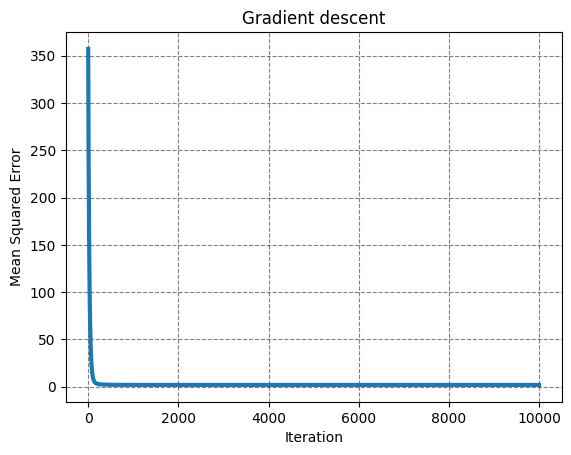

In [37]:
lr.mse_loss()

### 12. Residual Analysis & Regression Error Metrics 

In [38]:
residual = y_test - y_pred

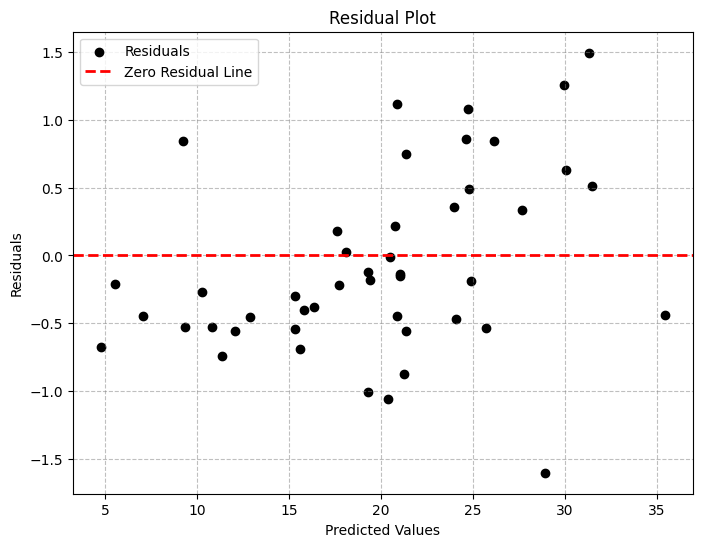

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residual, label='Residuals', color='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Residual Line')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.grid(True, ls='--', color='grey', alpha=0.5)
plt.show()

In [40]:
from scipy import stats

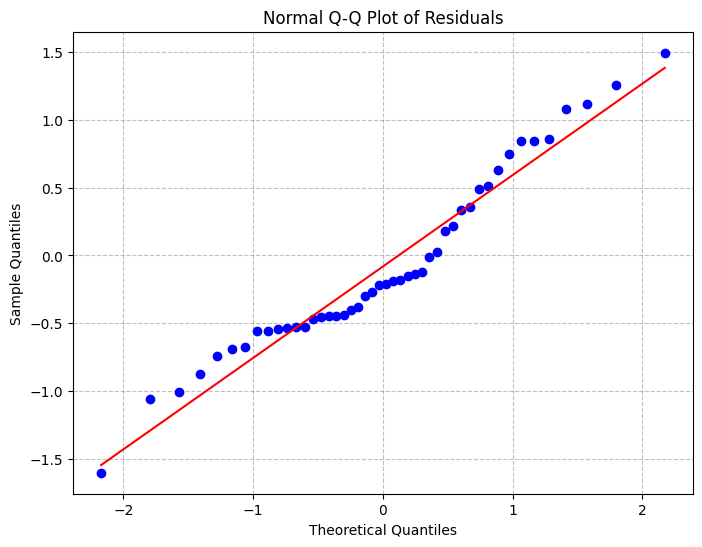

In [41]:
plt.figure(figsize=(8, 6))
stats.probplot(residual, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True, ls='--', color='grey', alpha=0.5)
plt.show()

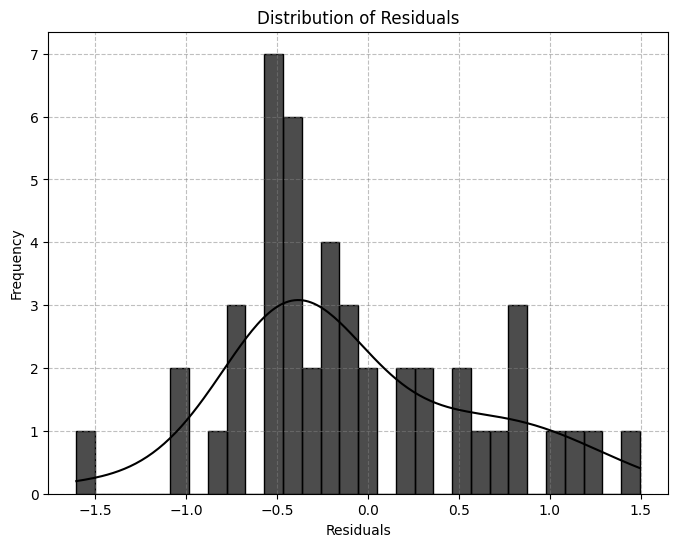

In [42]:
plt.figure(figsize=(8, 6))
sns.histplot(residual, bins=30, color='black', alpha=0.7, kde=True)  
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True, ls='--', color='grey', alpha=0.5)
plt.show()

In [43]:
#function to calculate mean absolute error
def mean_absolute_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mae = np.mean(np.abs(y_true - y_pred))
    return mae
    
#function for mean square error
def mean_squared_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

#function for root mean square error
def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

In [44]:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")

Mean Squared Error: 0.4479
Root Mean Squared Error: 0.6692
Mean Absolute Error: 0.5592


### 13. Score (Coefficient of determination)

In [45]:
#function for r square
def r_squared(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [46]:
print(f"R-squared: {r_squared(y_test, y_pred):.4f}")

R-squared: 0.9919


### 14. t-Statistics 

In [47]:
for j, t_statistic in zip(df.columns, lr.t_statistics):
    print(f"{j}: {t_statistic:.8f}")

density: 172.73546105
bodyfat: -36.64803583
age: 1.14969486
weight: 1.02009083
neck: -0.13622746
chest: 0.98978211
abdomen: 0.43143595
hip: 0.31375324
thigh: 0.39043425
knee: 0.15883331
ankle: -2.14244097
biceps: -0.94433703
forearm: -0.28927022
wrist: 0.04015382


### 15. Standard Error 

In [48]:
for j, se in zip(df.columns,  lr.standard_error):
    print(f"{j}: {se:.8f}")

density: 0.10733059
bodyfat: 0.19506616
age: 0.16344039
weight: 0.46165006
neck: 0.20494018
chest: 0.28743876
abdomen: 0.38890697
hip: 0.33753535
thigh: 0.26095505
knee: 0.22314390
ankle: 0.17847512
biceps: 0.19088511
forearm: 0.22684374
wrist: 0.20390924


### 16. Coefficient 

In [49]:
for j, coefficient in zip(df.columns, lr.coefficients):
    print(f"{j}: {coefficient:.8f}")

density: 18.53979898
bodyfat: -7.14879145
age: 0.18790658
weight: 0.47092499
neck: -0.02791848
chest: 0.28450175
abdomen: 0.16778844
hip: 0.10590281
thigh: 0.10188579
knee: 0.03544268
ankle: -0.38237240
biceps: -0.18025987
forearm: -0.06561914
wrist: 0.00818774


### 17. Degrees of Freedom & F-statistic

In [50]:
print("Df Residuals: ", lr.degrees_of_freedom)
print("F-statistic: ", lr.f_statistic)

Df Residuals:  170
F-statistic:  415.8601552363189


#### 18. STAT Model for Data Comparsion with previous build Model (LinearRegression)

In [51]:
import statsmodels.api as sm

In [52]:
X_train_val = sm.add_constant(X_train)
X_test_val = sm.add_constant(X_test)

In [53]:
model = sm.OLS(y_train, X_train_val).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     415.9
Date:                Mon, 18 Dec 2023   Prob (F-statistic):          2.08e-121
Time:                        02:48:45   Log-Likelihood:                -321.12
No. Observations:                 184   AIC:                             670.2
Df Residuals:                     170   BIC:                             715.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5398      0.107    172.735      0.0

### 19. References: 
- [Body Fat Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset/data)
- [Multiple Regression for Class Code](https://epurdom.github.io/Stat131A/lectures/2019FallLectures/05MultipleRegression_forClassCode.html)
